In [1]:

%load_ext blackcellmagic
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import (RepeatedKFold, cross_val_score,
                                     train_test_split)

from src.dataloader import DataLoader


In [17]:
#
RANDOM_STATE = 17

# set output to just 2 sig digits
np.set_printoptions(precision=2)

# Import the dataframe from our dataloader class
df = DataLoader().get_data_frame(date="Jun22_2020")

feature_names = list(df.columns)[1:]

# feature selection by SelectKBest, Pearson's corr coeff
sel_features = ['blue-blue-444', 'blue-red', 'green-red', 'green-red-650', 'green-531-red',
 'green-531-red-650', 'nir-red-edge', 'nir-red-edge-705', 'nir-red-edge-740',
 'red-edge-red-edge-705']

# X and y
# feat_idx = df.columns[df.columns.isin(sel_features)].values
# print(X.shape)
# X = df.loc[:, sel_features].values
X = df.iloc[:, 1:].values
y = df['yield'].values

# train test Split (0.7/0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RANDOM_STATE, shuffle=True)

# test validate split (0.3 split into 0.15/0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=RANDOM_STATE, shuffle=True)
# Important Note! Feature selection should be done AFTER test/train split, to avoid information leakage


# Random forest regressor

[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [20]:
reg = RandomForestRegressor(criterion="squared_error",n_estimators=10000, random_state=RANDOM_STATE, bootstrap=True, oob_score=False, max_samples=0.5)
reg.fit(X_train, y_train)



RandomForestRegressor(max_samples=0.5, n_estimators=10000, random_state=17)

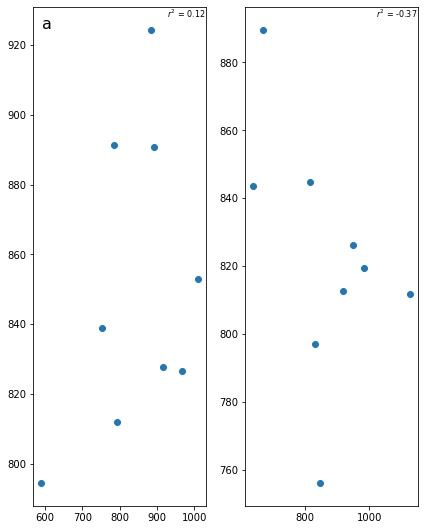

In [21]:
# test predictions
y_pred_t = reg.predict(X_test)

# validation predictions
y_pred_v = reg.predict(X_val)


# Display the images as one figure.
fig, axs = plt.subplots(1, 2)

axs[0].scatter(y_test, y_pred_t)
axs[0].annotate(
    "a",
    xy=(0.05, 0.98),
    xycoords="axes fraction",
    fontsize=16,
    horizontalalignment="left",
    verticalalignment="top",
)
axs[0].annotate(
    f"$r^2$ = {round(r2_score(y_test, y_pred_t), 2)}",
    xy=(1, 1),
    xycoords="axes fraction",
    fontsize=8,
    horizontalalignment="right",
    verticalalignment="top",
)


axs[1].scatter(y_val, y_pred_v)
axs[1].annotate(
    f"$r^2$ = {round(r2_score(y_val, y_pred_v), 2)}",
    xy=(1, 1),
    xycoords="axes fraction",
    fontsize=8,
    horizontalalignment="right",
    verticalalignment="top",
)

fig.tight_layout()
fig.set_figheight(8)